In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from sklearn import svm
# from sklearn.ensemble import RandomForestClassifier

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [84]:
train[train['DAYS_EMPLOYED']>0]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,1,0,0,1,NaN,1.0,-60.0,1.0
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,1,0,1,0,NaN,2.0,-17.0,1.0
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0


In [21]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [7]:
print(train.shape, test.shape)

(26457, 20) (10000, 19)


In [10]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [12]:
train.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [27]:
train['credit'].unique()

array([1., 2., 0.])

In [62]:
for i in train:
    print(i)

index
gender
car
reality
child_num
income_total
income_type
edu_type
family_type
house_type
DAYS_BIRTH
DAYS_EMPLOYED
FLAG_MOBIL
work_phone
phone
email
occyp_type
family_size
begin_month
credit


In [28]:
var_cat = ['gender','car','reality','income_type','edu_type','family_type',\
           'house_type','FLAG_MOBIL','work_phone','phone','email','occyp_type']
var_num = ['child_num','income_total','DAYS_BIRTH','DAYS_EMPLOYED','family_size','begin_month', 'credit']


In [67]:
# Categorical Variables

for i in train[var_cat]:
    row = train[i]
    print(i, '|', row.unique())

gender | ['F' 'M']
car | ['N' 'Y']
reality | ['N' 'Y']
income_type | ['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
edu_type | ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
family_type | ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
house_type | ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']
FLAG_MOBIL | [1]
work_phone | [0 1]
phone | [0 1]
email | [0 1]
occyp_type | [nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']


---

## EDA

### Heatmap (numerical var)

<AxesSubplot:>

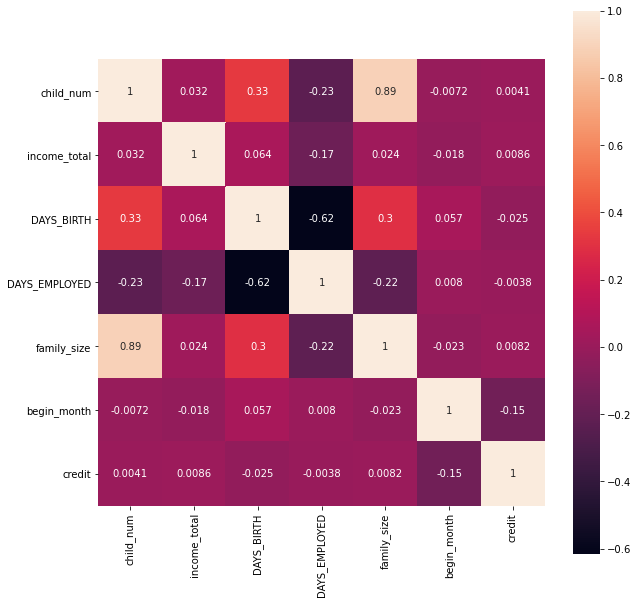

In [29]:
corr = train[var_num].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True)

### Histogram (numerical var)

### Count of data

#### Gender

Text(0.5, 1.0, 'Credit Distribution')

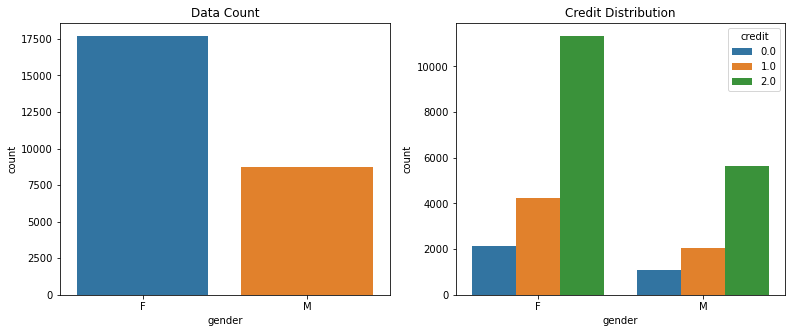

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
sns.countplot(x='gender', data=train, ax=axes[0])
axes[0].set_title('Data Count')
sns.countplot(x='gender', data=train, hue='credit', ax=axes[1])
axes[1].set_title('Credit Distribution')

<AxesSubplot:xlabel='gender'>

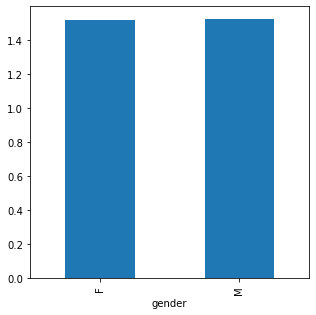

In [107]:
groupby_occupation = train.groupby('gender')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### Car

Text(0.5, 1.0, 'Credit Distribution')

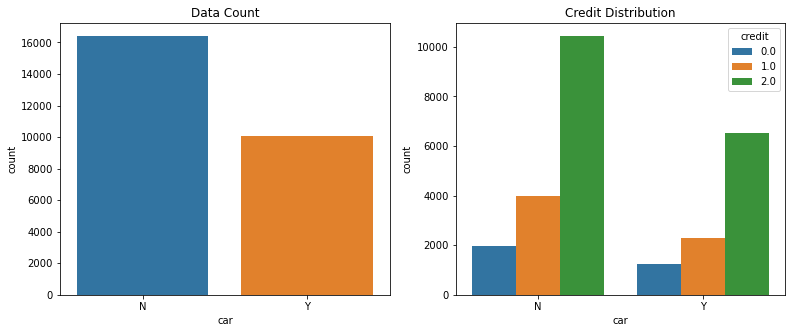

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
sns.countplot(x='car', data=train, ax=axes[0])
axes[0].set_title('Data Count')
sns.countplot(x='car', data=train, hue='credit', ax=axes[1])
axes[1].set_title('Credit Distribution')

<AxesSubplot:xlabel='car'>

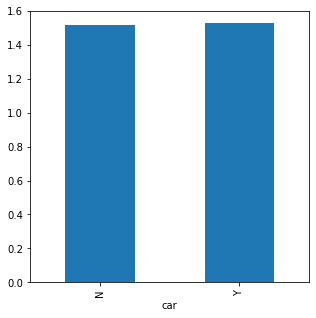

In [110]:
groupby_occupation = train.groupby('car')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### reality

Text(0.5, 1.0, 'Credit Distribution')

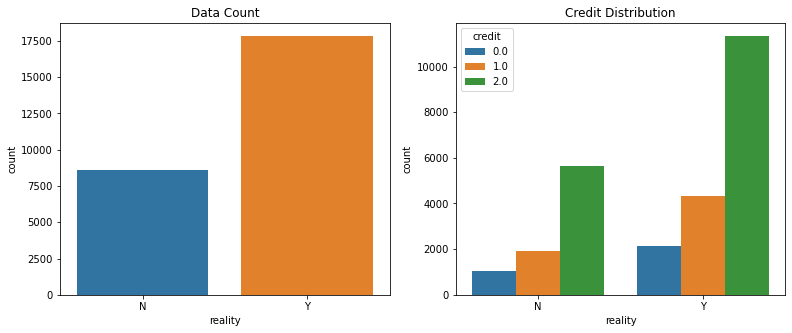

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
sns.countplot(x='reality', data=train, ax=axes[0])
axes[0].set_title('Data Count')
sns.countplot(x='reality', data=train, hue='credit', ax=axes[1])
axes[1].set_title('Credit Distribution')

<AxesSubplot:xlabel='reality'>

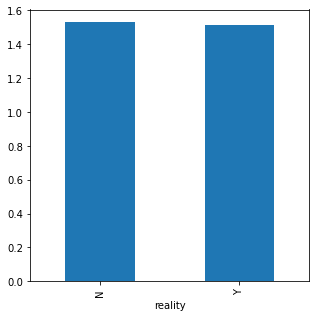

In [118]:
groupby_occupation = train.groupby('reality')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### income type

<AxesSubplot:xlabel='income_type', ylabel='count'>

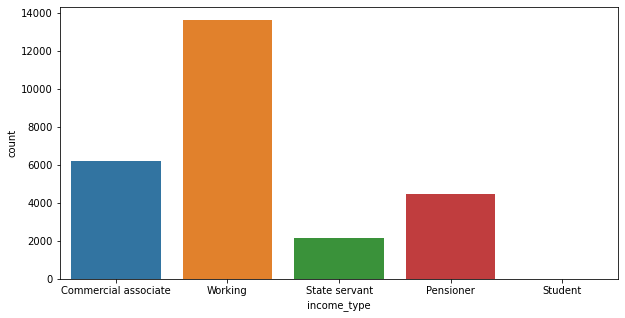

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='income_type', data=train)

<AxesSubplot:xlabel='income_type'>

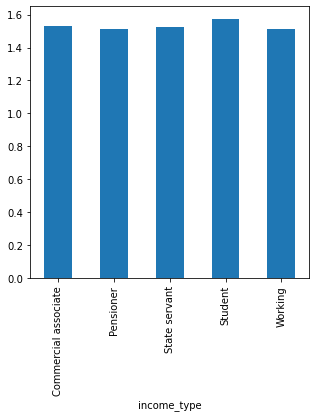

In [121]:
groupby_occupation = train.groupby('income_type')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### education type

<AxesSubplot:xlabel='edu_type', ylabel='count'>

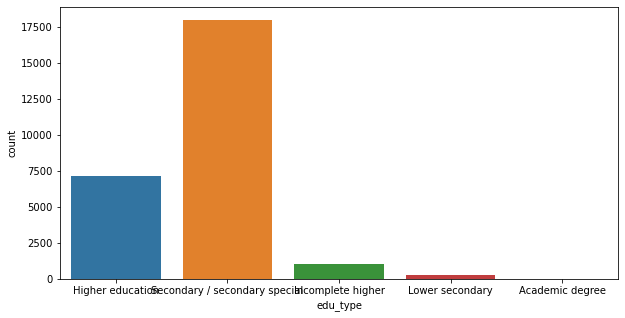

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='edu_type', data=train)

<AxesSubplot:xlabel='edu_type'>

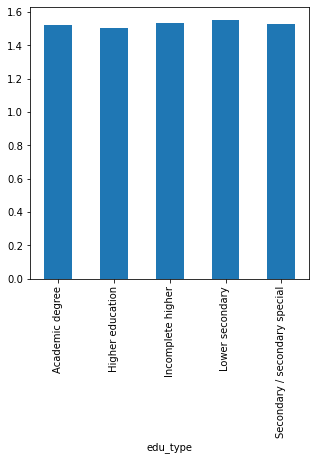

In [122]:
groupby_occupation = train.groupby('edu_type')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### family type

<AxesSubplot:xlabel='family_type', ylabel='count'>

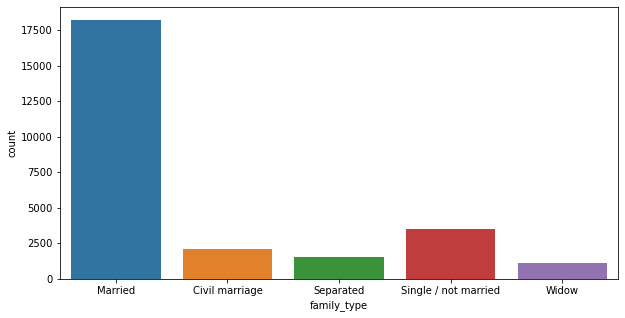

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='family_type', data=train)

<AxesSubplot:xlabel='family_type'>

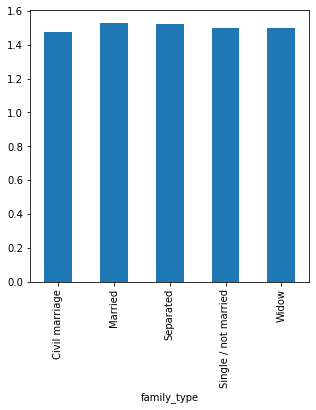

In [123]:
groupby_occupation = train.groupby('family_type')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### house type

<AxesSubplot:xlabel='house_type', ylabel='count'>

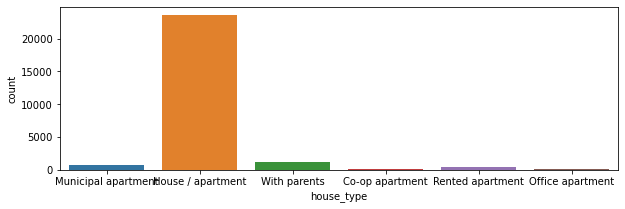

In [48]:
plt.figure(figsize=(10,3))
sns.countplot(x='house_type', data=train)

<AxesSubplot:xlabel='house_type'>

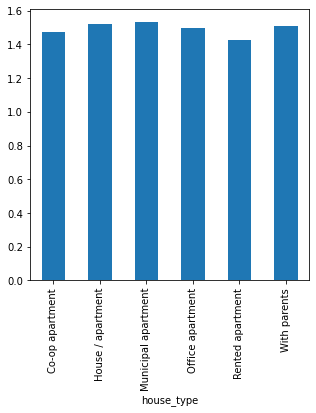

In [124]:
groupby_occupation = train.groupby('house_type')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### work phone

<AxesSubplot:xlabel='work_phone', ylabel='count'>

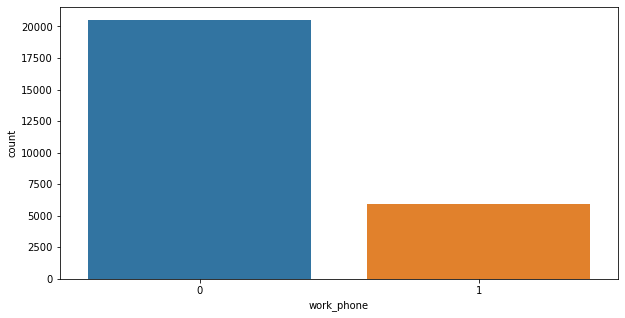

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x='work_phone', data=train)

<AxesSubplot:xlabel='work_phone'>

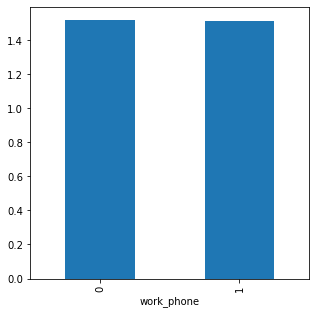

In [125]:
groupby_occupation = train.groupby('work_phone')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### phone

<AxesSubplot:xlabel='phone', ylabel='count'>

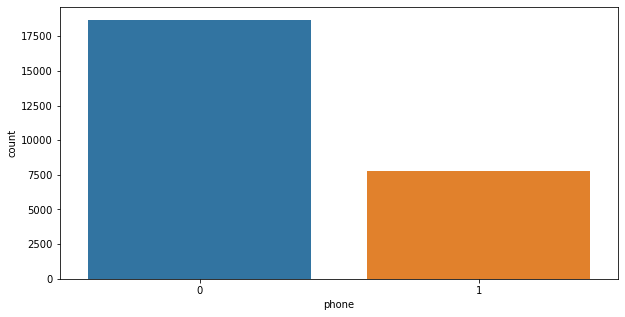

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='phone', data=train)

<AxesSubplot:xlabel='phone'>

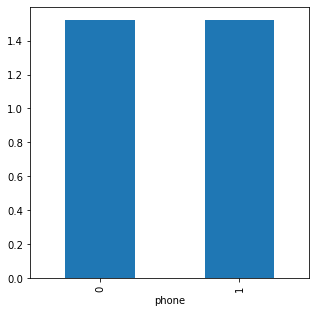

In [126]:
groupby_occupation = train.groupby('phone')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### email

<AxesSubplot:xlabel='email', ylabel='count'>

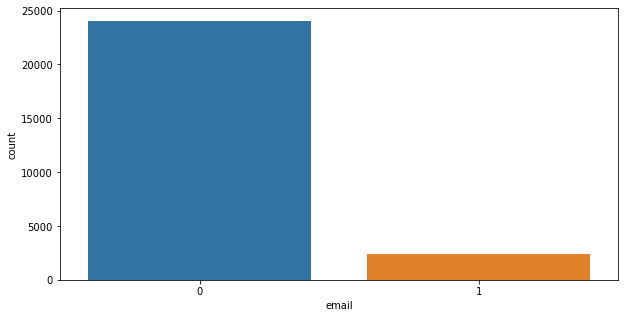

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='email', data=train)

<AxesSubplot:xlabel='email'>

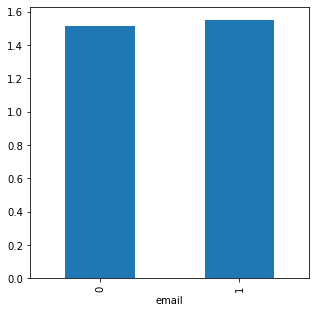

In [127]:
groupby_occupation = train.groupby('email')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### occupation

<AxesSubplot:xlabel='occyp_type', ylabel='count'>

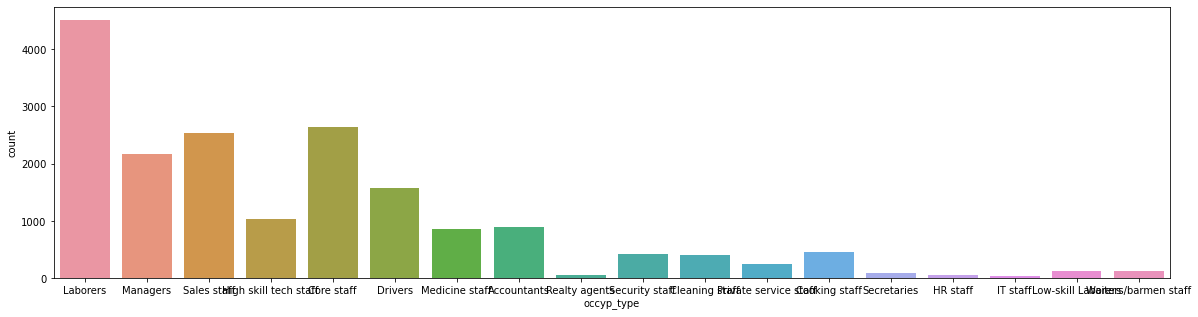

In [35]:
plt.figure(figsize=(20,5))
sns.countplot(x='occyp_type', data=train)

<AxesSubplot:xlabel='occyp_type'>

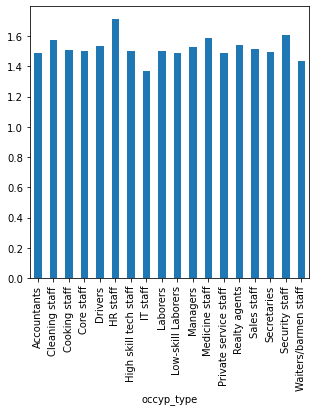

In [128]:
groupby_occupation = train.groupby('occyp_type')
groupby_occupation['credit'].mean().plot.bar(figsize=(5, 5))

#### credit

<AxesSubplot:xlabel='credit', ylabel='count'>

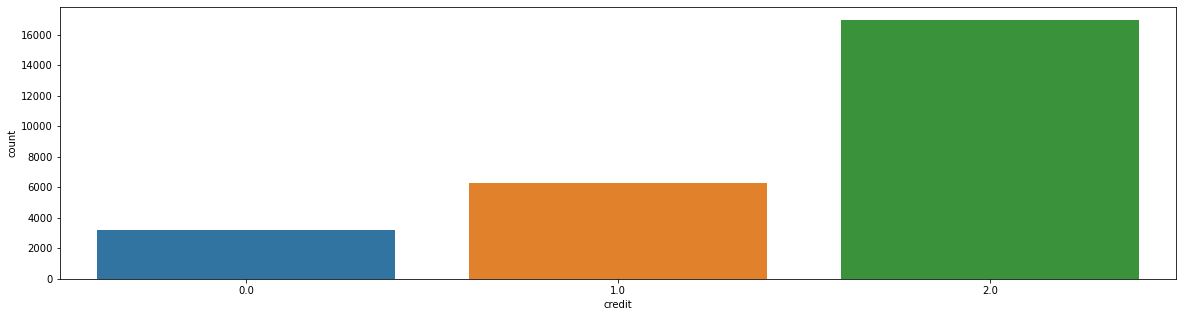

In [68]:
plt.figure(figsize=(20,5))
sns.countplot(x='credit', data=train)